# Part 1: Reduce the number of intensity levels in an image


### Import packages

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function to reduce the number of intensity levels in the image

In [24]:
def reduce_intensity_levels(image, levels):
    ratio = 255 / (levels - 1)
    reduced_image = np.round(image / ratio) * ratio
    return reduced_image.astype(np.uint8)

### Load the image in grey scale 

In [25]:
image = cv2.imread('Archie.jpeg', cv2.IMREAD_GRAYSCALE)

### Reduce the intensity levels of the image

In [26]:
reduced_image = reduce_intensity_levels(image, 2)

### Display the original and reduced intensity image

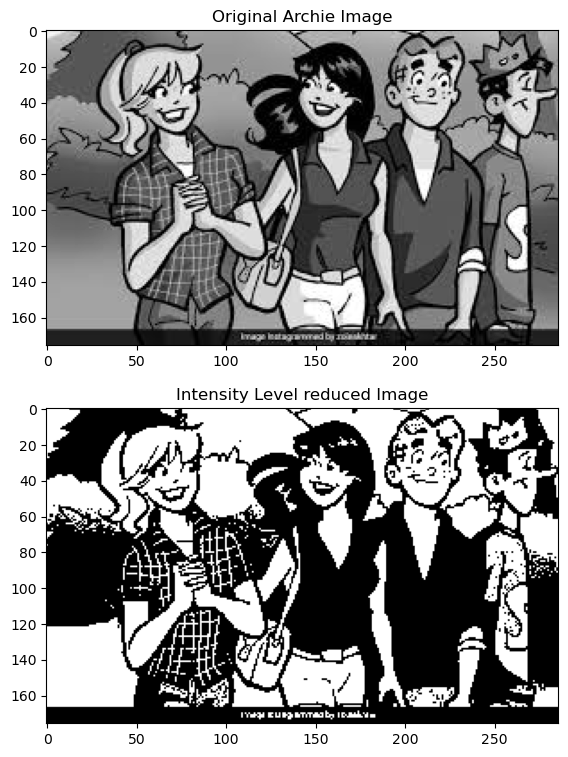

In [27]:
plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Archie Image')
plt.subplot(2, 1, 2)
plt.imshow(reduced_image, cmap='gray')
plt.title('Intensity Level reduced Image')
plt.show()

# Part 2: Load an image and perform spatial averaging



### Function to perform spatial averaging on the image

In [28]:
def spatial_average(image, neighbourhood_size):
    kernel = np.ones((neighbourhood_size, neighbourhood_size), np.float32) / (neighbourhood_size ** 2)
    the_averaged_image = cv2.filter2D(image, -1, kernel)
    return the_averaged_image

### Perform spatial averaging for different neighbourhood sizes

In [29]:
neighbourhood_sizes = [3, 10, 20]
the_averaged_images = [spatial_average(image, size) for size in neighbourhood_sizes]


### Display the results

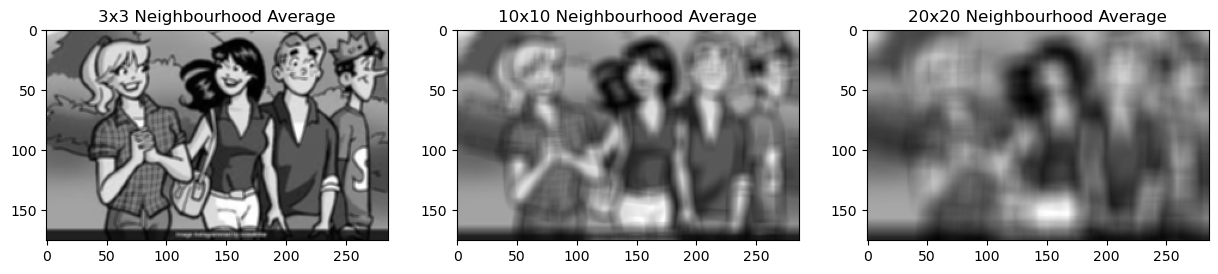

In [30]:
plt.figure(figsize=(15, 5))
for i, size in enumerate(neighbourhood_sizes):
    plt.subplot(1, len(neighborhood_sizes), i + 1)
    plt.imshow(the_averaged_images[i], cmap='gray')
    plt.title(f'{size}x{size} Neighbourhood Average')
plt.show()

# Part 3: Rotate an image by 45 and 90 degrees



### Function to rotate an image by a specified angle

In [32]:
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols / 2, rows / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

### Rotate the image by 45 and 90 degrees

In [33]:
rotated_45_degrees = rotate_image(image, 45)
rotated_90_degrees = rotate_image(image, 90)

### Display the results

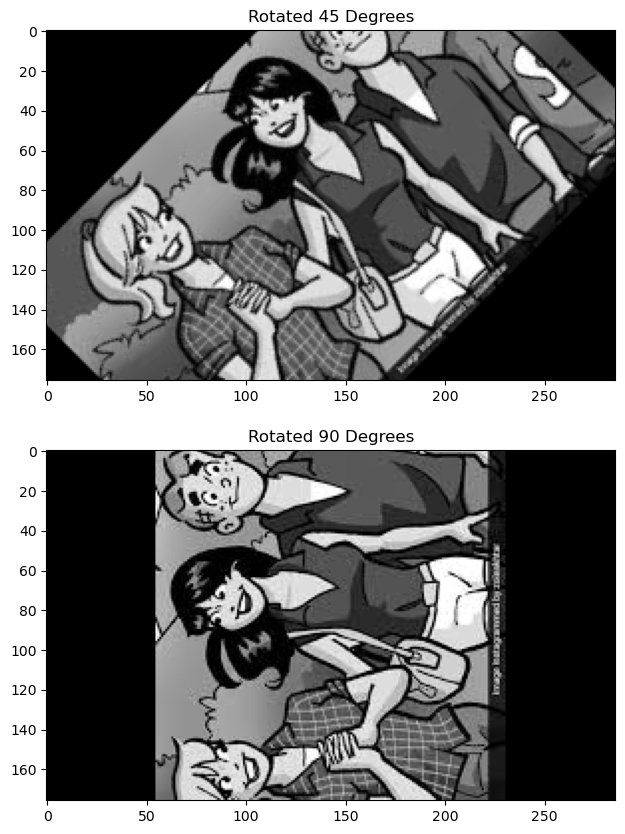

In [38]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(rotated_45_degrees, cmap='gray')
plt.title('Rotated 45 Degrees')
plt.subplot(2, 1, 2)
plt.imshow(rotated_90_degrees, cmap='gray')
plt.title('Rotated 90 Degrees')
plt.show()

# Part 4: Replace every 3x3 block of the image by their average

### Function to perform block averaging on an image

In [39]:
def block_average(image, block_size):
    averaged_image = np.zeros_like(image)
    for i in range(0, image.shape[0], block_size):
        for j in range(0, image.shape[1], block_size):
            block = image[i:i+block_size, j:j+block_size]
            averaged_value = np.mean(block)
            averaged_image[i:i+block_size, j:j+block_size] = averaged_value
    return averaged_image

### Perform block averaging for 3x3, 5x5, and 7x7 blocks

In [40]:
block_sizes = [3, 5, 7]
block_averaged_images = [block_average(image, size) for size in block_sizes]

### Display the original and block-averaged images

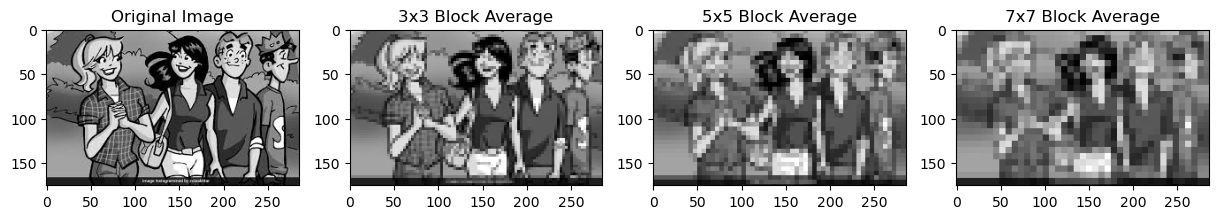

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(1, len(block_sizes) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
for i in range(len(block_sizes)):
    plt.subplot(1, len(block_sizes) + 1, i + 2)
    plt.imshow(block_averaged_images[i], cmap='gray')
    plt.title(f'{block_sizes[i]}x{block_sizes[i]} Block Average')

plt.show()